# Image Reconstruction using a simple AutoEncoder

In [3]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


### Download image data and read in numpy format

In [5]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Normalize the data and reshape

In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [7]:
train_x.shape

(60000, 784)

### Autoencoder Model

In [8]:
input_img = Input(shape=(784,))

W0818 14:01:35.040404 140069399033728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 14:01:35.093554 140069399033728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



#### Encoded part

In [9]:
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

W0818 14:04:09.906607 140069399033728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



#### Decoded part

In [0]:
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

In [0]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### Model Summary

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
__________

In [0]:
encoder = Model(input_img, encoded)

In [15]:
autoencoder.compile(optimizer='adam', loss='mse')

W0818 14:07:01.325718 140069399033728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [18]:
train_history = autoencoder.fit(train_x, train_x, epochs=50, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0356 - val_loss: 0.0331
Epoch 2/50
60000/60000 [==============================] - 36s 605us/step - loss: 0.0317 - val_loss: 0.0302
Epoch 3/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0290 - val_loss: 0.0276
Epoch 4/50
60000/60000 [==============================] - 36s 602us/step - loss: 0.0268 - val_loss: 0.0256
Epoch 5/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0248 - val_loss: 0.0242
Epoch 6/50
60000/60000 [==============================] - 36s 604us/step - loss: 0.0238 - val_loss: 0.0233
Epoch 7/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0228 - val_loss: 0.0239
Epoch 8/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0221 - val_loss: 0.0215
Epoch 9/50
60000/60000 [==============================] - 36s 603us/step - loss: 0.0215 - val_

### Prediction

In [0]:
pred = autoencoder.predict(val_x)

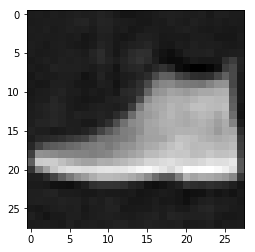

In [20]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

This  is how our predicted image looks like

### Original image for comparison

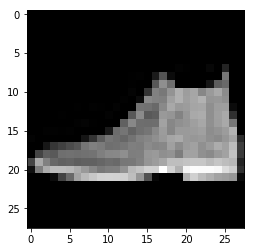

In [21]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

This is how a image is reconstructed using Autoencoders